<a href="https://colab.research.google.com/github/maadhuvijay/Project-3-AI-Bootcamp/blob/main/Lego_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LEGO Brick Classifier

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping


from PIL import Image
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

# Importing Data

In [51]:
# Upload a ZIP File and Extract
from google.colab import files
uploaded = files.upload()

Saving data_three.zip to data_three (1).zip


In [52]:
# Unzip the file

import zipfile
import imghdr

zip_file = "data_three.zip"  # Change to your filename
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/images")  # Extract to 'images' folder



In [53]:
#Load images


image_folder = "/content/images/data_three"
images = []


# Load images only if they are valid image files
for filename in os.listdir(image_folder):
    file_path = os.path.join(image_folder, filename)

    # Check if the file is a valid image
    if os.path.isfile(file_path):
        # Check if the file is a valid image
        if imghdr.what(file_path):
            img = Image.open(file_path)  # Open the image using PIL
            images.append(img)

print(f"Loaded {len(images)} images")
"""
# Loop through all files in the extracted folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)  # Read image
        img = cv2.resize(img, (60, 60))  # Resize
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        images.append(img)

#images_array = np.array(images)
#print(images_array.shape)  # Shape: (num_image


# Loop through all files in the extracted folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust for file types
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).resize((60, 60)).convert('RGB')  # Resize and convert to RGB
        images.append(np.array(img))  # Convert to NumPy array

print(f"Loaded {len(images)} images")
"""




Loaded 2400 images


'\n# Loop through all files in the extracted folder\nfor filename in os.listdir(image_folder):\n    if filename.endswith(".jpg") or filename.endswith(".png"):\n        img_path = os.path.join(image_folder, filename)\n        img = cv2.imread(img_path)  # Read image\n        img = cv2.resize(img, (60, 60))  # Resize\n        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB\n        images.append(img)\n\n#images_array = np.array(images)\n#print(images_array.shape)  # Shape: (num_image\n\n\n# Loop through all files in the extracted folder\nfor filename in os.listdir(image_folder):\n    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust for file types\n        img_path = os.path.join(image_folder, filename)\n        img = Image.open(img_path).resize((60, 60)).convert(\'RGB\')  # Resize and convert to RGB\n        images.append(np.array(img))  # Convert to NumPy array\n\nprint(f"Loaded {len(images)} images")\n'

# Extract the file names

In [54]:
# Create a dataframe to store the file names from Images

file_names = []
# Walk through the directory and get all image filenames
for root, _, files in os.walk(image_folder):
    for filename in files:
        file_path = os.path.join(root, filename)

        # Append only image files
        if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
            file_names.append({"filename": filename})


# Convert to DataFrame
file_names=set(f["filename"] for f in file_names)
filename_df = pd.DataFrame(file_names, columns=['filename'])

# Display DataFrame
filename_df.head()  # Show first few rows

,filename
0,27925 flat tile round 2x2 239R.png
1,27925 flat tile round 2x2 280L.png
2,3062 Round Brick 1x1 238L.png
3,27925 flat tile round 2x2 267L.png
4,27925 flat tile round 2x2 099L.png


In [55]:
print(filename_df.shape)

(2400, 1)


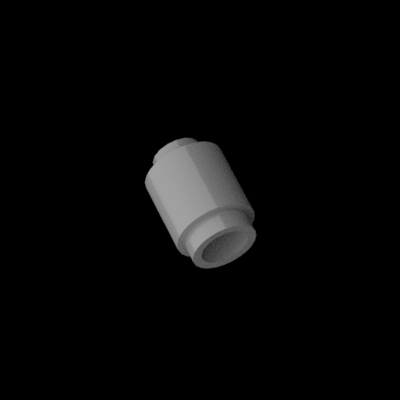

In [56]:
# Print a random image from the list to ensure the import was successful
images[700]

# Pre-processing Data

In [57]:
# Check the size of an image
images[5].size

(400, 400)

In [58]:
# Get all the sizes into a list, then convert to a set
sizes = set([img.size for img in images])
sizes

{(400, 400)}

In [59]:
print(type(images[1]))  # Should be a PIL Image

print(images[1].size)  # S

<class 'PIL.PngImagePlugin.PngImageFile'>
(400, 400)


In [3]:
# Use a for loop to resize all images to 250 by 250
target_size = (250,250)

resized_images = [img.resize(target_size, resample = Image.LANCZOS) for img in images]
resized_images[1]

NameError: name 'images' is not defined

In [61]:
# Verify the resizing of all images
# Get all the sizes into a list, then convert to a set
sizes = set([img.size for img in resized_images])
sizes

{(250, 250)}

In [62]:
# Check the image type and min/max values before conversion
print("Original image type:", type(resized_images[1]))  # Should be a PIL Image or numpy array
print("Original image size:", resized_images[1].size)  # Should show the dimensions
print("Original pixel range:")
print(np.array(resized_images[1]).min(), np.array(resized_images[1]).max())

Original image type: <class 'PIL.Image.Image'>
Original image size: (250, 250)
Original pixel range:
0 153


In [2]:
# Convert to NumPy array and then to float32


float_images = [np.array(img).astype(np.float32) for img in resized_images]
#print("Min pixel value after conversion:", float_images.min())
#print("Max pixel value after conversion:", float_images.max())

# Normalize pixel values to range [0, 1]
normalized_images = [float_images / 255.0 for float_images in float_images]
#print("Min pixel value after normalization:", float_images.min())
#print("Max pixel value after normalization:", float_images.max())

NameError: name 'resized_images' is not defined

In [1]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(normalized_images[900])
plt.show()

NameError: name 'normalized_images' is not defined

In [ ]:
#check the channel dimensions
normalized_images[0].shape

(250, 250, 3)

# Labels

In [ ]:
filename_df.head()

,filename
0,27925 flat tile round 2x2 239R.png
1,27925 flat tile round 2x2 280L.png
2,3062 Round Brick 1x1 238L.png
3,27925 flat tile round 2x2 267L.png
4,27925 flat tile round 2x2 099L.png


In [ ]:
print(filename_df.shape)

(2400, 1)


In [ ]:
# Function to handle different filename structures
def split_filename(filename):
    parts = filename.replace('.png', '').split()  # Remove .png if needed and split by space
    design_id = parts[0]  # First part is the design ID
    image_id = parts[-1]  # Last part is the image ID
    element_size = parts[-2]  # Second last part is the element size
    element_name = " ".join(parts[1:-2])  # Everything in between is the element name
    return pd.Series([design_id, element_name, element_size, image_id])


# Apply function to DataFrame
filename_df[['design_id', 'element_name', 'element_size', 'image_#']] = filename_df['filename'].apply(split_filename)

"""
# First, remove the .png file extension, then split into four new columns.
filename_df[['design_id', 'element_name', 'element_size', 'image_#']] = filename_df['filename']\
                                                            .str.replace('.png', '', regex=False)\
                                                            .str.split(' ', expand=True)

                                          """
filename_df.head()

,filename,design_id,element_name,element_size,image_#
0,27925 flat tile round 2x2 239R.png,27925,flat tile round,2x2,239R
1,27925 flat tile round 2x2 280L.png,27925,flat tile round,2x2,280L
2,3062 Round Brick 1x1 238L.png,3062,Round Brick,1x1,238L
3,27925 flat tile round 2x2 267L.png,27925,flat tile round,2x2,267L
4,27925 flat tile round 2x2 099L.png,27925,flat tile round,2x2,099L


In [ ]:
filename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filename      2400 non-null   object
 1   design_id     2400 non-null   object
 2   element_name  2400 non-null   object
 3   element_size  2400 non-null   object
 4   image_#       2400 non-null   object
dtypes: object(5)
memory usage: 93.9+ KB


In [ ]:
# Now we can call our preprocessed pixel data 'X'
X = normalized_images

# For our purposes, we'll select the userid column as 'y'
y = filename_df['design_id']

In [ ]:
# Check the total number of classes
y.nunique()

3

In [ ]:
# Get the actual class values
unique_classes = pd.Series(y).unique() # Convert y to a pandas Series
print(f"Unique class values: {unique_classes}")

Unique class values: ['27925' '3062' '3001']


In [ ]:
y.shape

(2400,)

In [ ]:
# Convert values to numpy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# Now we'll split our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Checking if the length of training and testing data sets are same

In [ ]:
# Print the length of each list
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1920
1920
480
480


In [ ]:
y_train.shape

(1920,)

In [ ]:
y_train [:8]

array(['27925', '3062', '3062', '3001', '27925', '3001', '3062', '3001'],
      dtype=object)

## Augmentation

In [ ]:
"""
# Apply augmentation to the whole training dataset
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         # Random rotation (20 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.2),             # Random zoom
    tf.keras.layers.RandomFlip('horizontal')     # Random horizontal flip
])

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through all the images.
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]

    # Add a channel dimension for grayscale images
    #img = np.expand_dims(img, axis=-1)  # Add channel dimension

    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Add 5 images for every original image
    for j in range(5):
        # Append a new image to the X list
        X_train_aug.append(data_augmentation(img, training=True)[0].numpy())
        # Append the label for the original image to the y list
        y_train_aug.append(label)

# Print the length of each list
print(len(X_train_aug))
print(len(y_train_aug))

"""

6000
6000


In [ ]:

"""
# Reshape test data for the model
X_test_np = []
for img in X_test:
    # Add a channel dimension for grayscale images
    #img = np.expand_dims(img, axis=-1)  # Add channel dimension
    # Append the image to the list
    X_test_np.append(img)

# Convert to numpy array
X_test_np = np.array(X_test_np)

# Check the shape of the first image
X_test_np[0].shape

"""

(60, 64, 3)

# Creating the CNN Model

In [ ]:
#One hot encode the y data
"""
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train_aug).reshape(-1, 1))
y_train_aug_enc = y_encoder.transform(np.array(y_train_aug).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))
"""

y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train).reshape(-1, 1))
y_train_enc = y_encoder.transform(np.array(y_train).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))

In [ ]:
y_train_enc.shape

(1920, 3)

In [ ]:
# Convert values to numpy arrays
"""
X_train_aug_np = np.array(X_train_aug)
X_test_np = np.array(X_test_np)
y_train_aug_np = np.array(y_train_aug_enc)
y_test_np = np.array(y_test_enc)
"""

X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train_enc)
y_test_np = np.array(y_test_enc)


In [ ]:
X_train_np.shape

(1920, 250, 250, 3)

In [ ]:
X_test_np.shape

(480, 250, 250, 3)

In [ ]:
y_train_np.shape

(1920, 3)

In [ ]:
y_test_np.shape

(480, 3)

In [ ]:
X_train_np = np.expand_dims(X_train_np[:, :, :, 0], axis=-1)
X_test_np = np.expand_dims(X_test_np[:, :, :, 0], axis=-1)

In [ ]:
X_train_np.shape

(1920, 250, 250, 1)

In [ ]:
X_test_np.shape

(480, 250, 250, 1)

In [ ]:
y_train_np[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np, test_size=0.3, random_state=42)

In [ ]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 1)),
    #layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    #layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu'),#,kernel_regularizer=keras.regularizers.l2(0.001)),
    #layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    #layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), activation='relu'),
    #layers.BatchNormalization(),

    #layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),#kernel_regularizer=keras.regularizers.l2(0.01)),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')
])

# Compile the model
#model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Create an EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., 'val_loss' or 'val_accuracy')
    patience=5,          # Number of epochs to wait for improvement before stopping
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Train the model with the callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)
"""
# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
"""
# Evaluate the model using the testing data
model.evaluate(X_test_np, y_test_np)

Epoch 1/25


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 7744, but received input with shape (32, 222784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 250, 250, 1), dtype=float32)
  • training=True
  • mask=None

In [ ]:
model.save('lego1.keras')

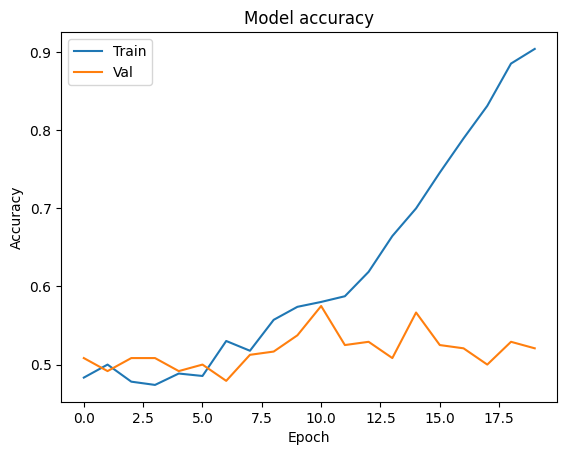

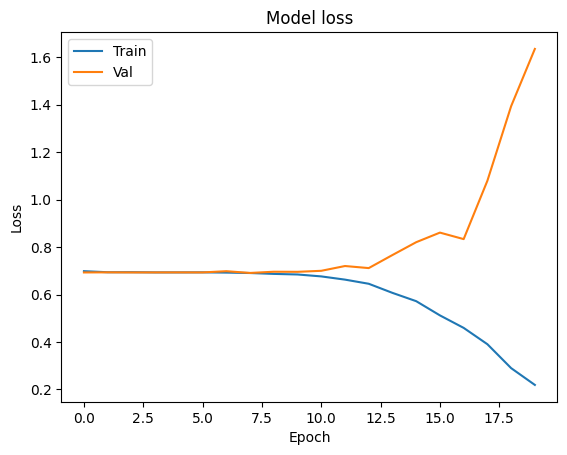

In [ ]:
# Plot Model performance

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Define the pre-trained ResNet50 Model

In [ ]:
"""
# Define the Resnet Model

from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 Model
base_model = ResNet50(weights='imagenet',include_top=False, input_shape=(60, 64, 3))

# Freeze the layers in the base model
base_model.trainable = False

# Build the new model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Replaces Flatten, prevents overfitting
    layers.Dense(128, activation='relu'),  # Adjust as needed
    layers.Dropout(0.5),  # Prevents overfitting
    layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 96
epochs = 25
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
# Print model summary
model.summary()

# Evaluate the model using the testing data
model.evaluate(X_test_np, y_test_np)

"""

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 625ms/step - accuracy: 0.1918 - loss: 1.6970 - val_accuracy: 0.2183 - val_loss: 1.6153
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 590ms/step - accuracy: 0.1797 - loss: 1.6142 - val_accuracy: 0.1817 - val_loss: 1.6096
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 578ms/step - accuracy: 0.2071 - loss: 1.6087 - val_accuracy: 0.1783 - val_loss: 1.6099
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 593ms/step - accuracy: 0.2273 - loss: 1.6094 - val_accuracy: 0.1783 - val_loss: 1.6101
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 587ms/step - accuracy: 0.2183 - loss: 1.6088 - val_accuracy: 0.1783 - val_loss: 1.6098
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 575ms/step - accuracy: 0.2092 - loss: 1.6093 - val_accuracy: 0.1783 - val_loss: 1.6097
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 589ms/step - accuracy: 0.2223 - loss: 1.6088 - val_accuracy: 0.1783 - val_loss: 1.6099
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 592ms/step - accuracy: 0.2207 - loss: 1.6079 - val_accu

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2, 2, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,376,465 (92.99 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 525,836 (2.01 MB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.1962 - loss: 1.6121


[1.6139097213745117, 0.18199999630451202]

## Hyperparamter tuning - Random search

In [ ]:
!pip install keras-tuner -q

import keras
from keras import layers
from keras_tuner import HyperModel, RandomSearch
import tensorflow as tf

# Define a model using HyperModel (used for hyperparameter tuning)
class CNNHyperModel(HyperModel):
    def build(self, hp):
        # Create a Sequential model
        model = keras.Sequential()

        # Hyperparameters for Conv2D layers
        model.add(layers.Conv2D(
            filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
            kernel_size=(3, 3),
            activation='relu',
            input_shape=(60, 60, 1)
        ))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(
            filters=hp.Int('conv_2_filters', min_value=64, max_value=128, step=32),
            kernel_size=(3, 3),
            activation='relu'
        ))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(
            filters=hp.Int('conv_3_filters', min_value=64, max_value=128, step=32),
            kernel_size=(3, 3),
            activation='relu'
        ))

        model.add(layers.Flatten())

        # Hyperparameter for Dense layer
        model.add(layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ))

        # Output layer
        model.add(layers.Dense(2, activation='softmax'))  # Binary classification

        # Compile the model
        model.compile(
            optimizer=keras.optimizers.Adam(),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model


# Instantiate the HyperModel
cnn_hypermodel = CNNHyperModel()

# Define the hyperparameter search
tuner = RandomSearch(
    cnn_hypermodel,
    objective='val_accuracy',  # We aim to optimize validation accuracy
    max_trials=4,               # Number of different hyperparameter combinations to test
    executions_per_trial=2,     # How many times to train each model
    directory='tuner_dir',      # Directory to save the results
    project_name='cnn_batch_tuning'  # Project name
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=32)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
best_model.evaluate(X_test_np, y_test_np)





Reloading Tuner from tuner_dir/cnn_batch_tuning/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.6410 - loss: 0.6552


[0.6550775766372681, 0.637499988079071]

In [ ]:

# Print best hyperparameters
print("Best Hyperparameters Found:")
for param in best_hyperparameters.values:  # Use best_hyperparameters instead of best_hps
    print(f"{param}: {best_hyperparameters.get(param)}")

Best Hyperparameters Found:
conv_1_filters: 128
conv_2_filters: 96
conv_3_filters: 128
dense_units: 128


## Classify the New LEGO images

In [ ]:
# Get the input image1 3001 brick
img_url=("https://images.brickset.com/parts/235721.jpg")
response=requests.get(img_url,stream=True).raw
img1=Image.open(response)

In [ ]:
#def predict_design(image):
  # Re-size the image to target image size
img1=img1.resize((60,60))

# Convert the image to grayscale
img1 = img1.convert('L') # convert to grayscale

# Convert the image to a NumPy array and normalize pixel values
img1_array = np.array(img1).astype(np.float32) / 255.0
img1_array = img1_array.reshape(1, img1_array.shape[0], img1_array.shape[1], 1)  # Reshape for single image prediction

  #Predict image1

predict_img1 = model.predict(img1_array)
predicted_class = np.argmax(predict_img1)  # Get class index
predict_desing_num= encoder.inverse_transform(predict_img1)

print(img1_array)
print(predict_img1)
print (f"Predicted class: {predicted_class}")
print (f"Predicted design number: {predicted_design_num}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]]
[[0.00900615 0.9909938 ]]
Predicted class: 1


In [ ]:
# Since it's binary classification, check if the probability for class 1 is > 0.5
predicted_class = (predict_img1 > 0.5).astype(int)  # Convert to 0 or 1 based on the threshold

# Print the predicted class
print(f"Predicted class for the image: {predicted_class[0][0]}")

prob_class_0 = predict_img1[0][0]  # Probability for class 0
print(f"Probability of being a LEGO piece (Class 0): {prob_class_0}")

Predicted class for the image: 1
Probability of being a LEGO piece (Class 0): 0.99993497133255


#Gradio application code

In [ ]:
!pip install gradio
!pip install pyttsx3
!sudo apt install espeak #Install espeak text-to-speech engine
!sudo apt install espeak-ng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 0s (4,122 

In [ ]:
# Import Gradio
import gradio as gr
import pyttsx3



In [ ]:
#Initialize the TTS engine
engine=pyttsx3.init()

#Funciton to convert text to speech
def text_to_speech(text):
    engine.save_to_file(text,"output.wav")
    engine.runAndWait()
    return "output.wav"

In [ ]:
app = gr.Interface(
    fn=predict_design,
    inputs=gr.Image(type="pil"),  # Accepts image upload
    outputs=[gr.Textbox(label="Predicted Design ID")],  # Outputs text
)


In [ ]:
app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e65de48d7802c13ace.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
